# h) repeat the above using JAX.

# **Setup**
Import the necessary libraries.

In [1]:
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Helper Functions
In this section, we create the various helper functions that we will need. Please see below for the list of helper functions:

**equation:** This takes in 3 inputs and returns the 3-dimensional non-linear equation.

**neural_network:** This function takes in parameters and inputs and returns the output of the neural network.

**loss_fn:** This function is the loss function and is used to calculate the loss.

**train_step:** This function performs a single training step of the neural network. It calculates the gradients of the loss function with respect to the current parameters using the grad function from JAX. Then, it updates the parameters by subtracting the gradients multiplied by a learning rate using jax.tree_map. This process is repeated iteratively during the training loop to optimize the parameters and minimize the loss.

**plot_4d:** This function takes in various inputs and plots the associated 4D plot.

In [2]:
# Define the 3-dimensional non-linear equation
def equation(x, y, z):
  return np.sin(x) * np.exp(-(y**2 + z**2)) + np.cos(y) * np.exp(-(x**2 + z**2)) + np.sin(z) * np.exp(-(x**2 + y**2))

In [3]:
# Define the neural network architecture
def neural_network(params, inputs):
    hidden1 = jnp.einsum('...ijk,kl->...ijl', inputs, params['W1']) + params['b1']
    hidden1 = jnp.tanh(hidden1)
    hidden2 = jnp.einsum('...ijl,lm->...ijm', hidden1, params['W2']) + params['b2']
    hidden2 = jnp.tanh(hidden2)
    output = jnp.einsum('...ijm,m->...ij', hidden2, params['W3']) + params['b3']
    return output

In [4]:
# Define the loss function
def loss_fn(params, inputs, targets):
    preds = neural_network(params, inputs)
    return jnp.mean((preds - targets)**2)

In [5]:
# Define the training step
@jit
def train_step(params, inputs, targets):
    grads = grad(loss_fn)(params, inputs, targets)
    return jax.tree_map(lambda p, g: p - 0.01 * g, params, grads)

In [6]:
# Define the modified plot_4d function
def plot_4d(X, Y, Z, W_true, W_pred):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    # Plot true values in blue
    ax.scatter(X.ravel(), Y.ravel(), Z.ravel(), c='b', label='True')
    # Plot predicted values in red with some transparency
    ax.scatter(X.ravel(), Y.ravel(), Z.ravel(), c='r', label='Predicted', alpha=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Generating Synthetic Data

In [7]:
# Generate synthetic data
x_data = np.linspace(-2, 2, 20)
y_data = np.linspace(-2, 2, 20)
z_data = np.linspace(-2, 2, 20)
X, Y, Z = np.meshgrid(x_data, y_data, z_data)
W_true = equation(X, Y, Z)

# Creating Model
Initialize Neural Network Parameters

In [8]:
# Initialize the neural network parameters
layer_sizes = [3, 64, 32, 1]
params = {
    'W1': jnp.zeros((layer_sizes[0], layer_sizes[1])),
    'b1': jnp.zeros(layer_sizes[1]),
    'W2': jnp.zeros((layer_sizes[1], layer_sizes[2])),
    'b2': jnp.zeros(layer_sizes[2]),
    'W3': jnp.zeros((layer_sizes[2],)),
    'b3': jnp.zeros(())
}

# Training Model

In [9]:
# Train the neural network
num_epochs = 1000
for epoch in range(num_epochs):
    params = train_step(params, jnp.stack((X, Y, Z), axis=-1), W_true[..., None])

    if (epoch + 1) % 100 == 0:
        # Generate predictions using the current model parameters
        W_pred = neural_network(params, jnp.stack((X, Y, Z), axis=-1)).squeeze()

        # Calculate the loss
        loss = loss_fn(params, jnp.stack((X, Y, Z), axis=-1), W_true[..., None])

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}")
        print("Predictions:")
        print(W_pred)
        print()

<ipython-input-5-11400bb0c10f>:5: DeprecationWarning: jax.tree_map is deprecated: use jax.tree.map (jax v0.4.25 or newer) or jax.tree_util.tree_map (any JAX version).
  return jax.tree_map(lambda p, g: p - 0.01 * g, params, grads)


Epoch 100/1000, Loss: 0.1371
Predictions:
[[[0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]
  [0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]
  [0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]
  ...
  [0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]
  [0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]
  [0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]]

 [[0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]
  [0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]
  [0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]
  ...
  [0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]
  [0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]
  [0.06259127 0.06259127 0.06259127 ... 0.06259127 0.06259127 0.06259127]]

 [[0.06259127 0.06259127 0.06259127 ... 0.06259127 0.0

# Generate Predictions

In [10]:
# Generate predictions using the trained model
W_pred = neural_network(params, jnp.stack((X, Y, Z), axis=-1)).squeeze()

# Plotting Data

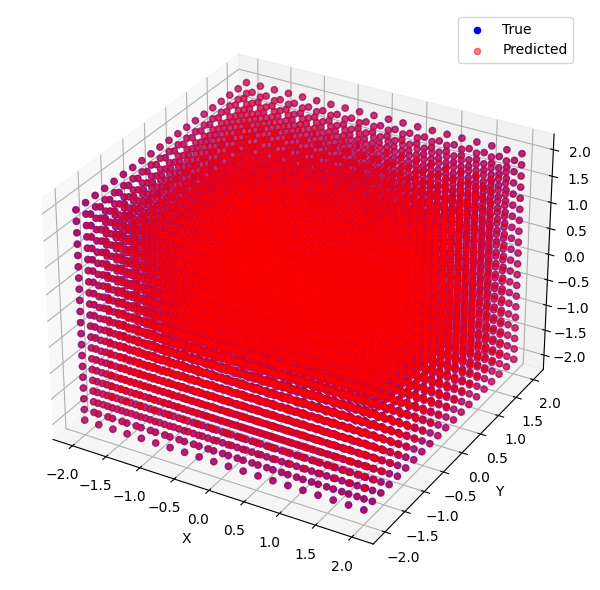

In [11]:
# Plot the 4-D plot
plot_4d(X, Y, Z, W_true, W_pred)